<a href="https://colab.research.google.com/github/brunogresende/ppca-aed/blob/main/Aloca%C3%A7%C3%A3o_de_Pessoas_em_Trabalho_Remoto_Scheduling_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pulp
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpConstraint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Notations
n     = 20  #number of days for planning (20 = 1 month)
tAJr  = 20  #number of junior analysts
tASr  = 15  #number of senior analysts
tE    = 5   #number of specialists
max_day_team_absence = math.ceil((tAJr + tASr + tE)*0.3) #max absence allowed in team (30%), ceil rounding

#Decision variables
#Absences: 1 if day-off, 0 otherwise
var_LAJr = LpVariable.dicts("AbsenceAJr", (range(n), range(tAJr)), 0, 1, "Binary")
var_LASr = LpVariable.dicts("AbsenceASr", (range(n), range(tASr)), 0, 1, "Binary")
var_LE   = LpVariable.dicts("AbsenceEsp", (range(n), range(tE)), 0, 1, "Binary")

#Remote: 1 if remote work, 0 otherwise
var_AJr = LpVariable.dicts("RemoteAJr", (range(n), range(tAJr)), 0, 1, "Binary")
var_ASr = LpVariable.dicts("RemoteASr", (range(n), range(tASr)), 0, 1, "Binary")
var_E   = LpVariable.dicts("RemoteEsp", (range(n), range(tE)), 0, 1, "Binary")

#Objective function
obj = None
for i in range(n):
  for j in range(tE):
    obj += var_E[i][j]
    for jj in range(tAJr):
      obj += var_AJr[i][jj]
      for jjj in range(tASr):
        obj += var_ASr[i][jjj]

problem = LpProblem("Schedule", LpMaximize)
problem += obj

In [3]:
max_day_team_absence

12

In [4]:
#Constraint 0
#Absences configuration

#funci AJr 1, 0-5 dias de férias
for i in range(0,5):
  problem += var_LAJr[i][1] == 1

#funci ASr 0, 5-15 dias de férias
for i in range(5,15):
  problem += var_LASr[i][0] == 1

#funci AJr 5, 15-20 dias de férias
for i in range(15,20):
  problem += var_LAJr[i][5] == 1

#funci Esp 1, 3 dias de abono
for i in range(17,19):
  problem += var_LE[i][1] == 1

#funci AJr 10, 2 dias de abono
for i in range(3,5):
  problem += var_AJr[i][10] == 1

#funci ASr 1, 2 dias de abono
for i in range(4,6):
  problem += var_LASr[i][1] == 1


In [5]:
#Constraint 1
#Cada funcionário poderá estar trabalhando remoto (1), trabalhando no escritório (0) ou ausente (1), de forma excludente. 

c = None

for i in range(n):
  
  for j in range(tAJr):
    c = lpSum(var_AJr[i][j] + var_LAJr[i][j]) <= 1
    problem += c
    
  for jj in range(tASr):
    c = lpSum(var_ASr[i][jj] + var_LASr[i][jj]) <= 1
    problem += c
      
  for jjj in range(tE):
    c = lpSum(var_E[i][jjj] + var_LE[i][jjj]) <= 1
    problem += c 


In [6]:
#Constraint 2 
#Cada funcionário poderá ser alocado no máximo 8 dias em home-office no mês. 
for j in range(tAJr):
  c = None
  for i in range(n):
    c += var_AJr[i][j]
  problem += c <=8

for j in range(tASr):
  c = None
  for i in range(n):
    c += var_ASr[i][j]
  problem += c <=8

for j in range(tE):
  c = None
  for i in range(n):
    c += var_E[i][j]
  problem += c <=8


In [7]:
#Constraint 3
#A quantidade máxima de ausências do escritório deve ser 30% do total de funcionários da equipe. 

c = None
for i in range(n):
  for j in range(tAJr):
    c += var_AJr[i][j] + var_LAJr[i][j]

  for jj in range(tASr):
    c += var_ASr[i][jj] + var_LASr[i][jj]

  for jjj in range(tE):
    c += var_E[i][jjj] + var_LE[i][jjj]

problem += (c <= max_day_team_absence*n)

In [8]:
#Constraint 4
#Pelo menos um Especialista deve estar presente no escritório em um dia de trabalho

for i in range(n):
  c = None
  for j in range(tE):
    c += var_E[i][j] + var_LE[i][j]
  problem += (c <= tE-1)


In [9]:
#See the modeled problem
problem

Schedule:
MAXIMIZE
5*RemoteAJr_0_0 + 5*RemoteAJr_0_1 + 5*RemoteAJr_0_10 + 5*RemoteAJr_0_11 + 5*RemoteAJr_0_12 + 5*RemoteAJr_0_13 + 5*RemoteAJr_0_14 + 5*RemoteAJr_0_15 + 5*RemoteAJr_0_16 + 5*RemoteAJr_0_17 + 5*RemoteAJr_0_18 + 5*RemoteAJr_0_19 + 5*RemoteAJr_0_2 + 5*RemoteAJr_0_3 + 5*RemoteAJr_0_4 + 5*RemoteAJr_0_5 + 5*RemoteAJr_0_6 + 5*RemoteAJr_0_7 + 5*RemoteAJr_0_8 + 5*RemoteAJr_0_9 + 5*RemoteAJr_10_0 + 5*RemoteAJr_10_1 + 5*RemoteAJr_10_10 + 5*RemoteAJr_10_11 + 5*RemoteAJr_10_12 + 5*RemoteAJr_10_13 + 5*RemoteAJr_10_14 + 5*RemoteAJr_10_15 + 5*RemoteAJr_10_16 + 5*RemoteAJr_10_17 + 5*RemoteAJr_10_18 + 5*RemoteAJr_10_19 + 5*RemoteAJr_10_2 + 5*RemoteAJr_10_3 + 5*RemoteAJr_10_4 + 5*RemoteAJr_10_5 + 5*RemoteAJr_10_6 + 5*RemoteAJr_10_7 + 5*RemoteAJr_10_8 + 5*RemoteAJr_10_9 + 5*RemoteAJr_11_0 + 5*RemoteAJr_11_1 + 5*RemoteAJr_11_10 + 5*RemoteAJr_11_11 + 5*RemoteAJr_11_12 + 5*RemoteAJr_11_13 + 5*RemoteAJr_11_14 + 5*RemoteAJr_11_15 + 5*RemoteAJr_11_16 + 5*RemoteAJr_11_17 + 5*RemoteAJr_11_18 + 5*R

In [10]:
# Solve the problem

status = problem.solve()

# Print results
print(f"Solution Time: {problem.solutionTime}")
print(f"Solution CPU Time: {problem.solutionCpuTime}")
print(f"Status: {problem.status}, {LpStatus[problem.status]}")
print(f"Objective: {problem.objective.value()}")


Solution Time: 0.06706047058105469
Solution CPU Time: 0.0629999999946449
Status: 1, Optimal
Objective: 12480.0


In [11]:
# Initialize Matrix with zeros
matAJr = np.array([0]*n*tAJr).reshape(n,tAJr)
matASr = np.array([0]*n*tASr).reshape(n,tASr)
matEsp = np.array([0]*n*tE).reshape(n,tE)

for var in problem.variables():
    m = var.name.split("_")
    if "AJr" in m[0] and var.value() == 1:
        if "Absence" in m[0]:
            matAJr[int(m[1])][int(m[2])] = -1
        else:
            matAJr[int(m[1])][int(m[2])] = 1 
    if "ASr" in m[0] and var.value() == 1:
        if "Absence" in m[0]:
            matASr[int(m[1])][int(m[2])] = -1
        else:
            matASr[int(m[1])][int(m[2])] = 1
    if "Esp" in m[0] and var.value() == 1:
        if "Absence" in m[0]:
            matEsp[int(m[1])][int(m[2])] = -1
        else:
            matEsp[int(m[1])][int(m[2])] = 1

#pmatAJr = pd.DataFrame(matAJr)
#pmatASr = pd.DataFrame(matASr)
#pmatEsp = pd.DataFrame(matEsp)  

matrix = np.concatenate((matAJr,matASr,matEsp), axis=1)
#pmatrix = pd.DataFrame(matrix)

print(matrix)
#print(pmatrix)

[[ 0 -1  1  0  0  0  0  1  1  1  0  0  0  1  0  0  0  1  0  0  1  1  0  0
   1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -1  0  0  1  1  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0
   1  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1 -1  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
   0  1  0  1  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 1 -1  1  0  1  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0  1  0  0  0
   0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1 -1  1  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  1 -1  0  0
   0  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  1  1  0  1  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0 -1 -1  0  1
   0  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  1  1
   1  1  0  0  1  1  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  1  0  0 -1  0  1  1
   0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]


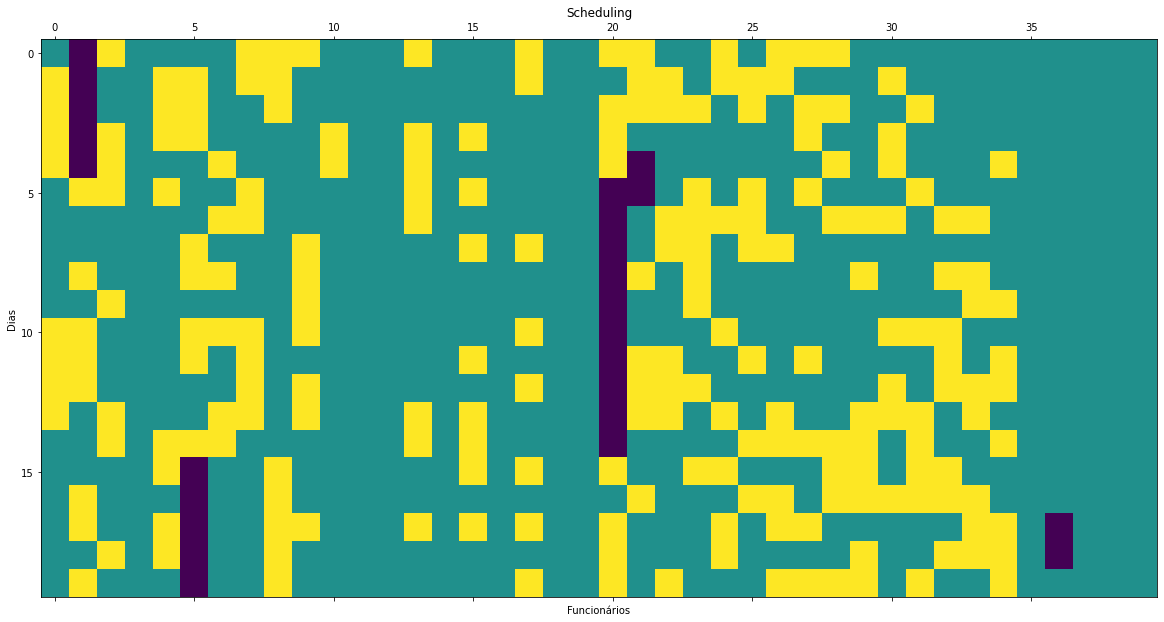

In [12]:
fig = plt.figure(figsize=(20,15))

# Creating subplot/axes
ax = fig.add_subplot()

# Setting axes/plot title
ax.set_title('Scheduling')

# Setting X-axis and Y-axis labels
ax.set_ylabel('Dias')
ax.set_xlabel('Funcionários', )

ax.matshow(matrix)

# Showing the plot
plt.show()

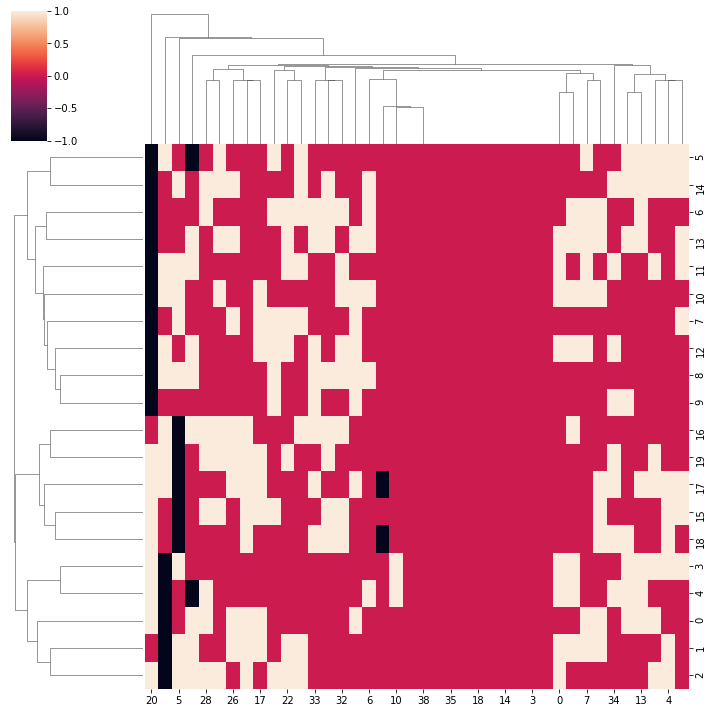

In [13]:
sns.clustermap(matrix)

In [14]:
for var in problem.variables():
    print(f"{var.name}: {var.value()}")

for name, constraint in problem.constraints.items():
    print(f"{name}: {constraint.value()}")

AbsenceAJr_0_0: 0.0
AbsenceAJr_0_1: 1.0
AbsenceAJr_0_10: 0.0
AbsenceAJr_0_11: 0.0
AbsenceAJr_0_12: 0.0
AbsenceAJr_0_13: 0.0
AbsenceAJr_0_14: 0.0
AbsenceAJr_0_15: 0.0
AbsenceAJr_0_16: 0.0
AbsenceAJr_0_17: 0.0
AbsenceAJr_0_18: 0.0
AbsenceAJr_0_19: 0.0
AbsenceAJr_0_2: 0.0
AbsenceAJr_0_3: 0.0
AbsenceAJr_0_4: 0.0
AbsenceAJr_0_5: 0.0
AbsenceAJr_0_6: 0.0
AbsenceAJr_0_7: 0.0
AbsenceAJr_0_8: 0.0
AbsenceAJr_0_9: 0.0
AbsenceAJr_10_0: 0.0
AbsenceAJr_10_1: 0.0
AbsenceAJr_10_10: 0.0
AbsenceAJr_10_11: 0.0
AbsenceAJr_10_12: 0.0
AbsenceAJr_10_13: 0.0
AbsenceAJr_10_14: 0.0
AbsenceAJr_10_15: 0.0
AbsenceAJr_10_16: 0.0
AbsenceAJr_10_17: 0.0
AbsenceAJr_10_18: 0.0
AbsenceAJr_10_19: 0.0
AbsenceAJr_10_2: 0.0
AbsenceAJr_10_3: 0.0
AbsenceAJr_10_4: 0.0
AbsenceAJr_10_5: 0.0
AbsenceAJr_10_6: 0.0
AbsenceAJr_10_7: 0.0
AbsenceAJr_10_8: 0.0
AbsenceAJr_10_9: 0.0
AbsenceAJr_11_0: 0.0
AbsenceAJr_11_1: 0.0
AbsenceAJr_11_10: 0.0
AbsenceAJr_11_11: 0.0
AbsenceAJr_11_12: 0.0
AbsenceAJr_11_13: 0.0
AbsenceAJr_11_14: 0.0
AbsenceA